In [1]:
#### Loading dataset ##

Loading Dataset

In [2]:
import torch
from torch.utils.data import Dataset


In [4]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
training_data = datasets.FashionMNIST(root='data', train=True, transform=ToTensor(),download=True)

100%|██████████| 26421880/26421880 [00:05<00:00, 4867810.95it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 222255.33it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:05<00:00, 796096.87it/s] 


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [8]:
test_data = datasets.FashionMNIST(root='data', train=False, transform=ToTensor(),download=True)

In [9]:
training_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Visualize data

In [25]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

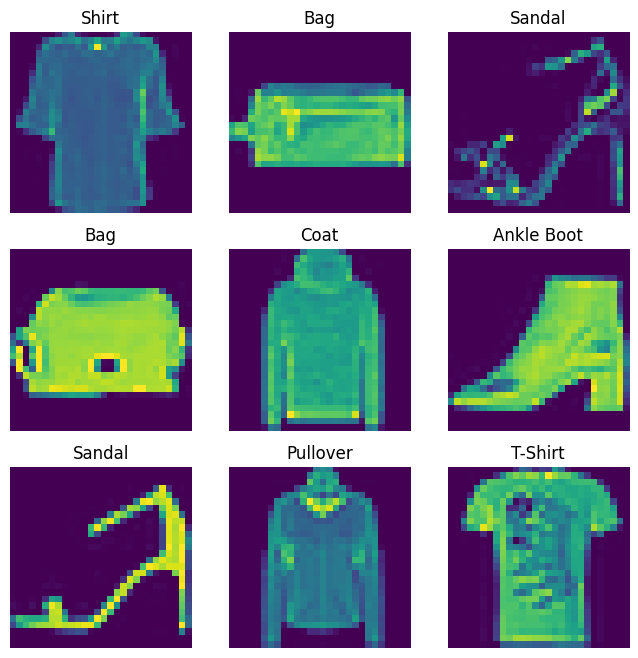

In [30]:
img, label = training_data[0]


figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows +1):
    random_idx = torch.randint(0, len(training_data), size=(1,)).item()
    img, label_idx = training_data[random_idx]
    label_name = labels_map[label_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label_name)
    plt.axis('off')
    plt.imshow(img.squeeze())

plt.show()



## Dataloader to load training data

In [33]:
from torch.utils.data.dataloader import DataLoader

In [34]:
training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle = False)

In [37]:
batch_feature, batch_labels = next(iter(training_dataloader))
batch_feature.size(), batch_labels.size()

(torch.Size([64, 1, 28, 28]), torch.Size([64]))